In [1]:
# Stdlib
import itertools
import multiprocessing

# Data
import pandas as pd
import numpy as np

# Viz
from matplotlib import pyplot as plt

# Problem


Say we have a set of n elements of slightly various weight:

In [2]:
n_cylinders = 4

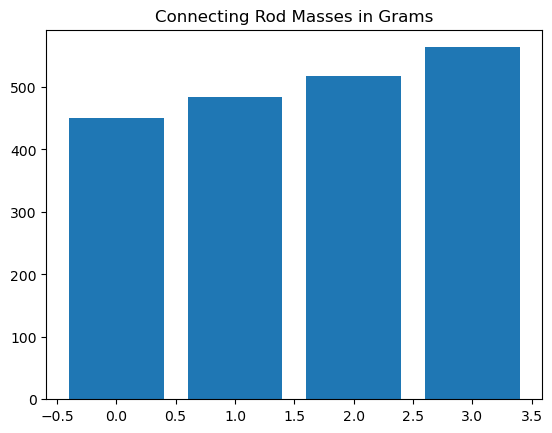

In [3]:
mass_rods = sorted(np.random.uniform(400, 600, n_cylinders).round(1))
plt.bar(np.arange(len(mass_rods)), mass_rods)
plt.title('Connecting Rod Masses in Grams')
plt.show()

We also have n piston ends of various masses:

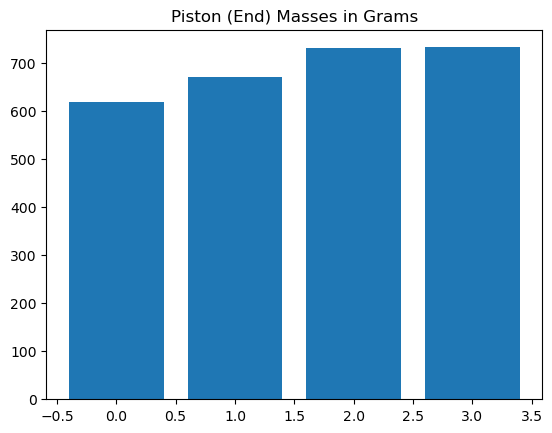

In [4]:
mass_pistons = sorted(np.random.uniform(500, 750, n_cylinders).round(1))
plt.bar(np.arange(len(mass_pistons)), mass_pistons)
plt.title('Piston (End) Masses in Grams')
plt.show()

We also have pins:

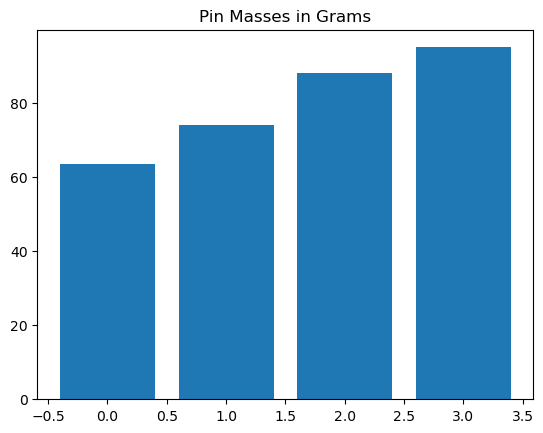

In [5]:
mass_pins = sorted(np.random.uniform(60, 100, n_cylinders).round(1))
plt.bar(np.arange(len(mass_pins)), mass_pins)
plt.title('Pin Masses in Grams')
plt.show()

So we have three arrays of varying masses:

In [6]:
mass_pins

[63.5, 74.0, 87.9, 94.9]

In [7]:
mass_pistons

[617.7, 670.9, 731.1, 731.9]

In [8]:
mass_rods

[450.9, 483.4, 518.5, 563.7]

The question, given these parts, is:

__How can we assemble [n] sets of (pin, rod, piston) such that the variance between sets is minimized?__

# Brute Force Approach

Assemble every possible permutation of (pin, rod, piston), take the std of each completed set, and choose the one with the lowest std.

In [9]:
## Single-Threaded: ###
# Calculate all possible combinations of sets
rod_combinations = list(itertools.permutations(mass_pins))
piston_combinations = list(itertools.permutations(mass_pistons))
pin_combinations = list(itertools.permutations(mass_rods))

# Function to calculate the weight difference of the sets
def weight_difference(sets):
    total_weights = [sum(s) for s in sets]
    return max(total_weights) - min(total_weights)

min_diff = float('inf')
optimal_arrangement = None

# Iterate through all possible combinations and find the one with the smallest weight difference
for rods in rod_combinations:
    for pistons in piston_combinations:
        for pins in pin_combinations:
            sets = list(zip(rods, pistons, pins))
            diff = weight_difference(sets)
            if diff < min_diff:
                min_diff = diff
                optimal_arrangement = sets

print("Optimal arrangement:", optimal_arrangement)
print("Minimum weight difference:", round(min_diff, 1))

Optimal arrangement: [(63.5, 731.1, 483.4), (74.0, 670.9, 518.5), (87.9, 617.7, 563.7), (94.9, 731.9, 450.9)]
Minimum weight difference: 14.6


^ This works fine for a 4-banger but the combinatorial explosion gets weird beyond that.

Time to parallelize. It probably won't fit in memory. See the /src directory for optimized multithreading code.